<a href="https://colab.research.google.com/github/deemoo0/lab-exam-ml/blob/main/linear%20regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   Age  Height  Weight        Bmi       BmiClass
0   61    1.85  109.30  31.935720  Obese Class 1
1   60    1.71   79.02  27.023700     Overweight
2   60    1.55   74.70  31.092612  Obese Class 1
3   60    1.46   35.90  16.841809    Underweight
4   60    1.58   97.10  38.896010  Obese Class 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 741 entries, 0 to 740
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       741 non-null    int64  
 1   Height    741 non-null    float64
 2   Weight    741 non-null    float64
 3   Bmi       741 non-null    float64
 4   BmiClass  741 non-null    object 
dtypes: float64(3), int64(1), object(1)
memory usage: 29.1+ KB
None
              Age      Height      Weight         Bmi
count  741.000000  741.000000  741.000000  741.000000
mean    31.618084    1.709427   78.412497   26.365427
std     11.655466    0.085974   32.254547    9.223191
min     15.000000    1.460000   25.900000   1

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


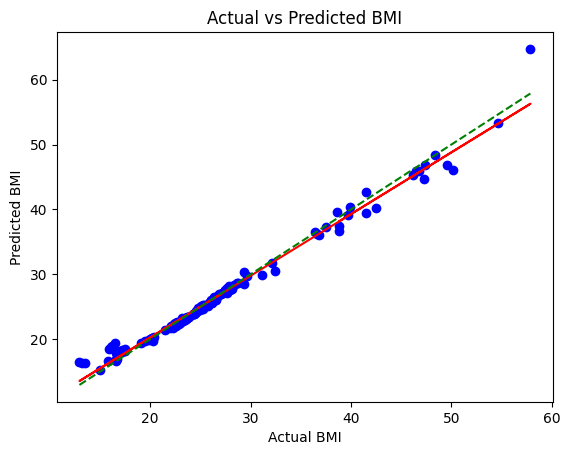

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


data = pd.read_csv(r"https://raw.githubusercontent.com/deemoo0/lab-exam-ml/refs/heads/main/bmi.csv")


print(data.head())
print(data.info())
print(data.describe())
data["Height"] = 100 * data["Height"]


X = data[["Age", "Height", "Weight"]]
y = data["Bmi"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


new_person = [[25, 170, 70]]
predicted_bmi = model.predict(new_person)
print("Predicted BMI:", predicted_bmi[0])


plt.scatter(y_test, y_pred, color="blue", label="Predicted points")
m, b = np.polyfit(y_test, y_pred, 1)
plt.plot(y_test, m*y_test + b, color="red", label="Best Fit Line")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         color="green", linestyle="--", label="Ideal Line (y=x)")
plt.xlabel("Actual BMI")
plt.ylabel("Predicted BMI")
plt.title("Actual vs Predicted BMI")
plt.show()
